# Computer vision - Week_03 - Image segmentation

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import disk
from skimage import data, filters, color
from skimage.color import rgb2gray

## Segmentation by intensity
Segmenting the image by thresholding means that I set a certain threshold and set a condition. If the pixels in the image have a higher value than the given threshold, they will be displayed, if they are lower, they will not be displayed.

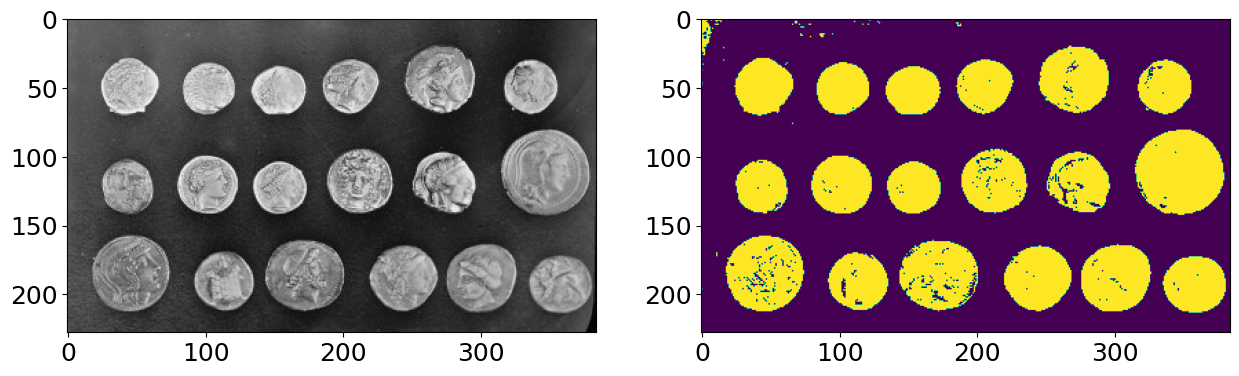

In [9]:
coins = data.coins()
coins = coins[75:, :]
plt.rcParams['font.size']=18
plt.figure(figsize= (15, 10))
plt.subplot(121)
plt.imshow(coins, cmap= 'gray')
plt.subplot(122)

threshold = 100
# threshold = 50
# threshold = 150
segmentation_mask_of_coins = coins > threshold

plt.imshow(segmentation_mask_of_coins)

Text(0, 0.5, 'Pixel count')

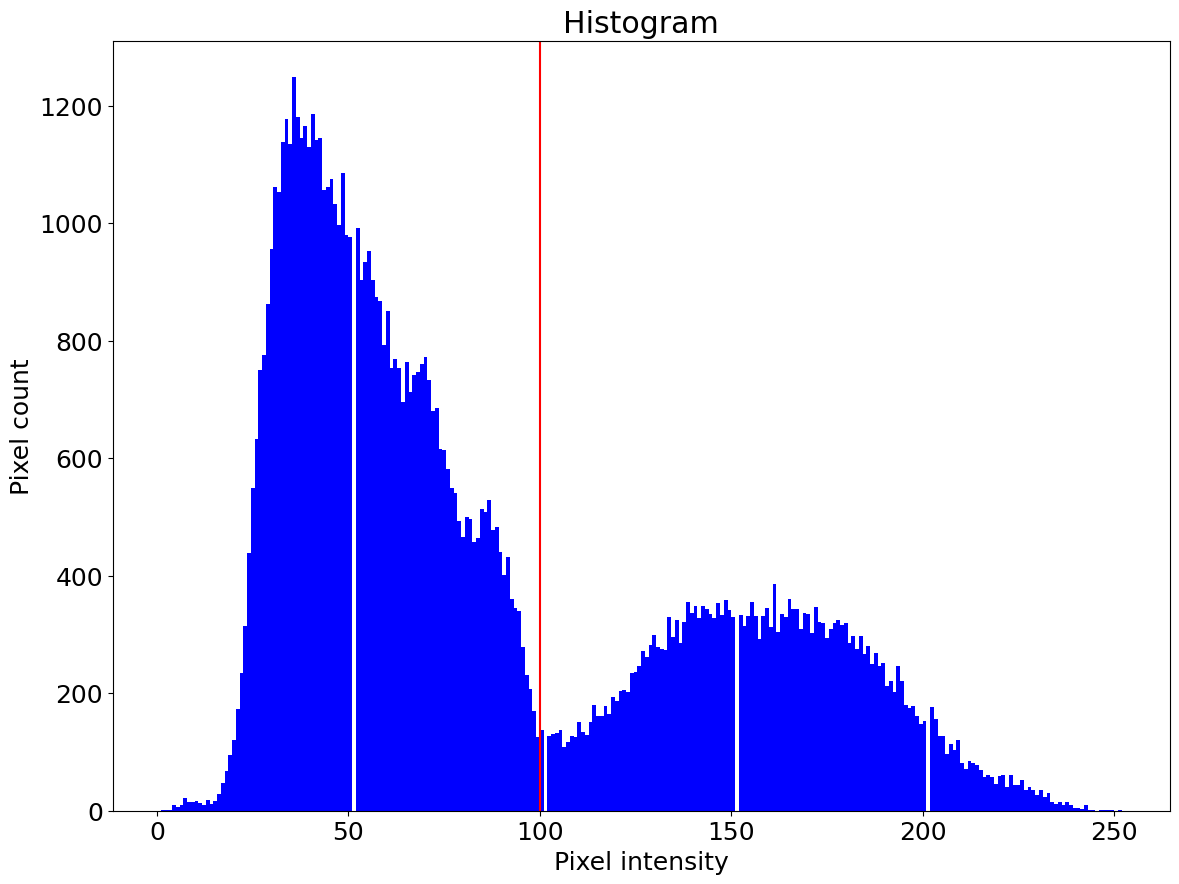

In [12]:
plt.figure(figsize= (30, 10))

ax1 = plt.subplot(121)
plt.hist(coins.ravel(), bins= 256, histtype= 'bar', color= 'blue')
ax1.axvline(threshold, color= 'r')
plt.title("Histogram")
plt.xlabel("Pixel intensity")
plt.ylabel("Pixel count")

### Optimal threshold finding
In the histogram we can see two distinct peaks. Optimally, the threshold should be located at the intersection of these two curves.

One of the ways to automatically find the value of the threshold is to try to find the intersection of the mentioned Gaussian curves. If the brightness values of background and object pixels are Gaussian distributed, this value will be optimal.

We will calculate the average value of the hashes of the foreground points, which at initialization are all the points of the image, except for the mentioned corner points. The threshold initialization value is calculated as the average of the background and foreground brightness values. The image is further thresholded with the current value. We calculate the new background and foreground values and then the new threshold value. The cycle ends if the new threshold value differs from the flood value by only a little, in our case 0.1


Initial threshold value: 130
Converged to optimal threshold in 5 iterations with threshold: 108.13560341311842


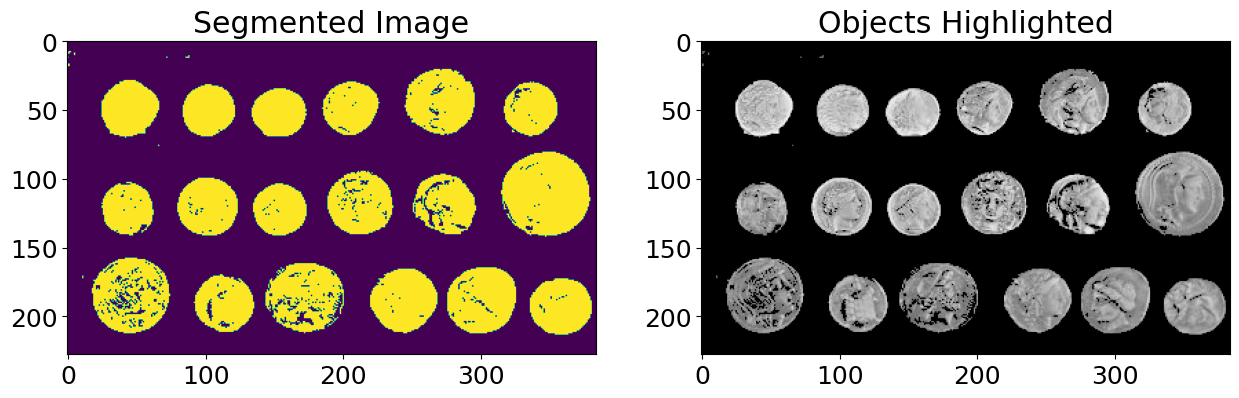

In [15]:
# Load the 'coins' image and set an initial threshold value
# coins = ...  # Load your image here
trshld = 130  # Initial threshold value

# Print the initial threshold value
print("Initial threshold value:", trshld)

# Initialize a counter to keep track of iterations
counter = 0

# Start an iterative process to find the optimal threshold
while True:
    # Create a binary mask for the background and object based on the current threshold
    background = coins < trshld
    obj = coins >= trshld

    # Calculate the mean intensity values for the object and background regions
    meanObjectIntensity = np.mean(coins[obj])
    meanBackgroundIntensity = np.mean(coins[background])

    # Calculate the new threshold value as the average of object and background intensities
    newTrshld = (meanObjectIntensity + meanBackgroundIntensity) / 2

    # Increment the counter
    counter += 1

    # Check if the absolute difference between the old and new threshold is less than 0.01
    if np.abs(trshld - newTrshld) < 0.01:
        break

    # Update the threshold value with the new value for the next iteration
    trshld = newTrshld

# Print the converged optimal threshold and the number of iterations
print("Converged to optimal threshold in {} iterations with threshold: {}".format(counter, trshld))

# Create a plot to visualize the segmented image and the original image with objects highlighted
plt.figure(figsize=(15, 10))
plt.subplot(121)
plt.imshow(coins > trshld)
plt.title("Segmented Image")
plt.subplot(122)
plt.imshow(coins * (coins > trshld), cmap='gray')
plt.title("Objects Highlighted")
plt.show()

Text(0, 0.5, 'Pixel count')

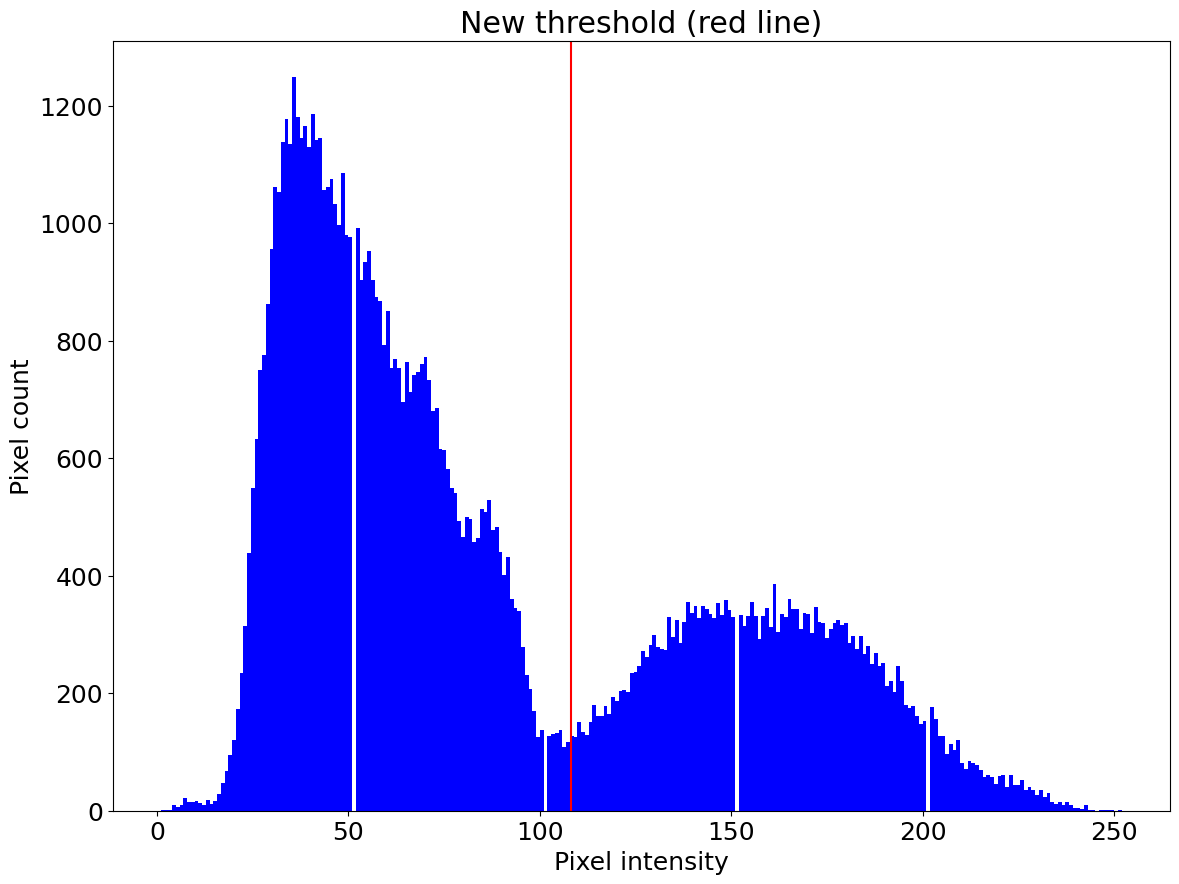

In [18]:
plt.figure(figsize= (30, 10))

ax1 = plt.subplot(121)
plt.hist(coins.ravel(), bins= 256, histtype= 'bar', color= 'blue')
ax1.axvline(trshld, color= 'r')
plt.title("New threshold (red line)")
plt.xlabel("Pixel intensity")
plt.ylabel("Pixel count")

### Uneven lighting
However, thresholding with one strip for all points of the image is not suitable, for example, if the scene is not evenly lit.
`plt.imshow(page < 120)`

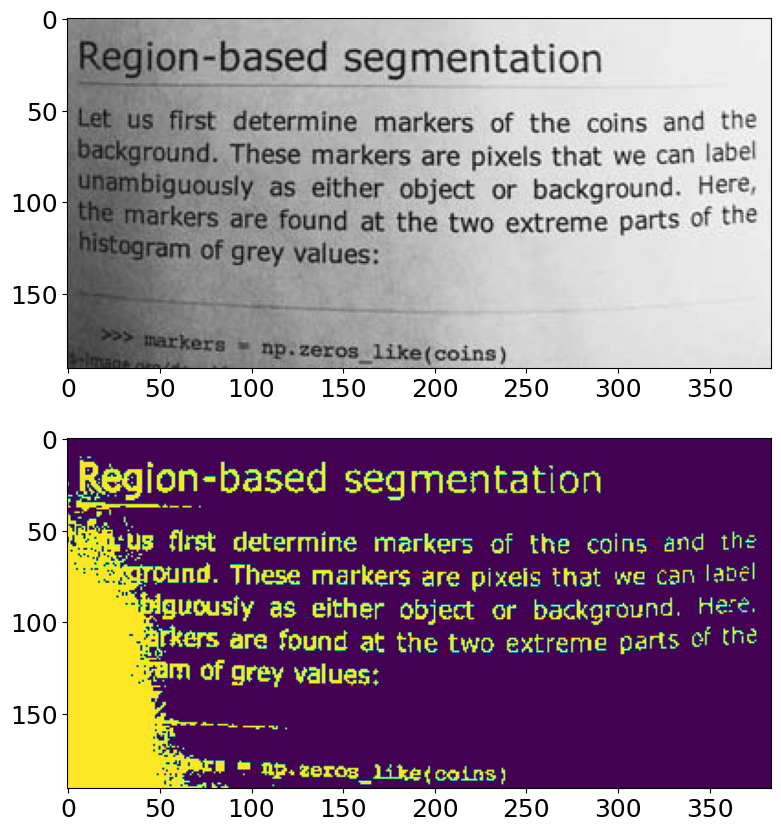

In [19]:
page = data.page()
plt.rcParams['font.size']=18
plt.figure(figsize= (15, 10))
plt.subplot(211)
plt.imshow(page, cmap= 'gray')
plt.subplot(212)
plt.imshow(page < 120)

### Implemented segmentation algorithms
A quick overview of the different segmentation algorithms available in SKimage.

With uneven lighting, we cannot rely only on simple segmentation, as part of the image will be mostly incomprehensible, as you can see in the image above. If we were to set the threshold below a lower value, we would no longer see pixels with a high value, for example the letters on the right side of the image. Since they are more illuminated, they may not be visible if we choose a lower threshold for letters in the shadow.

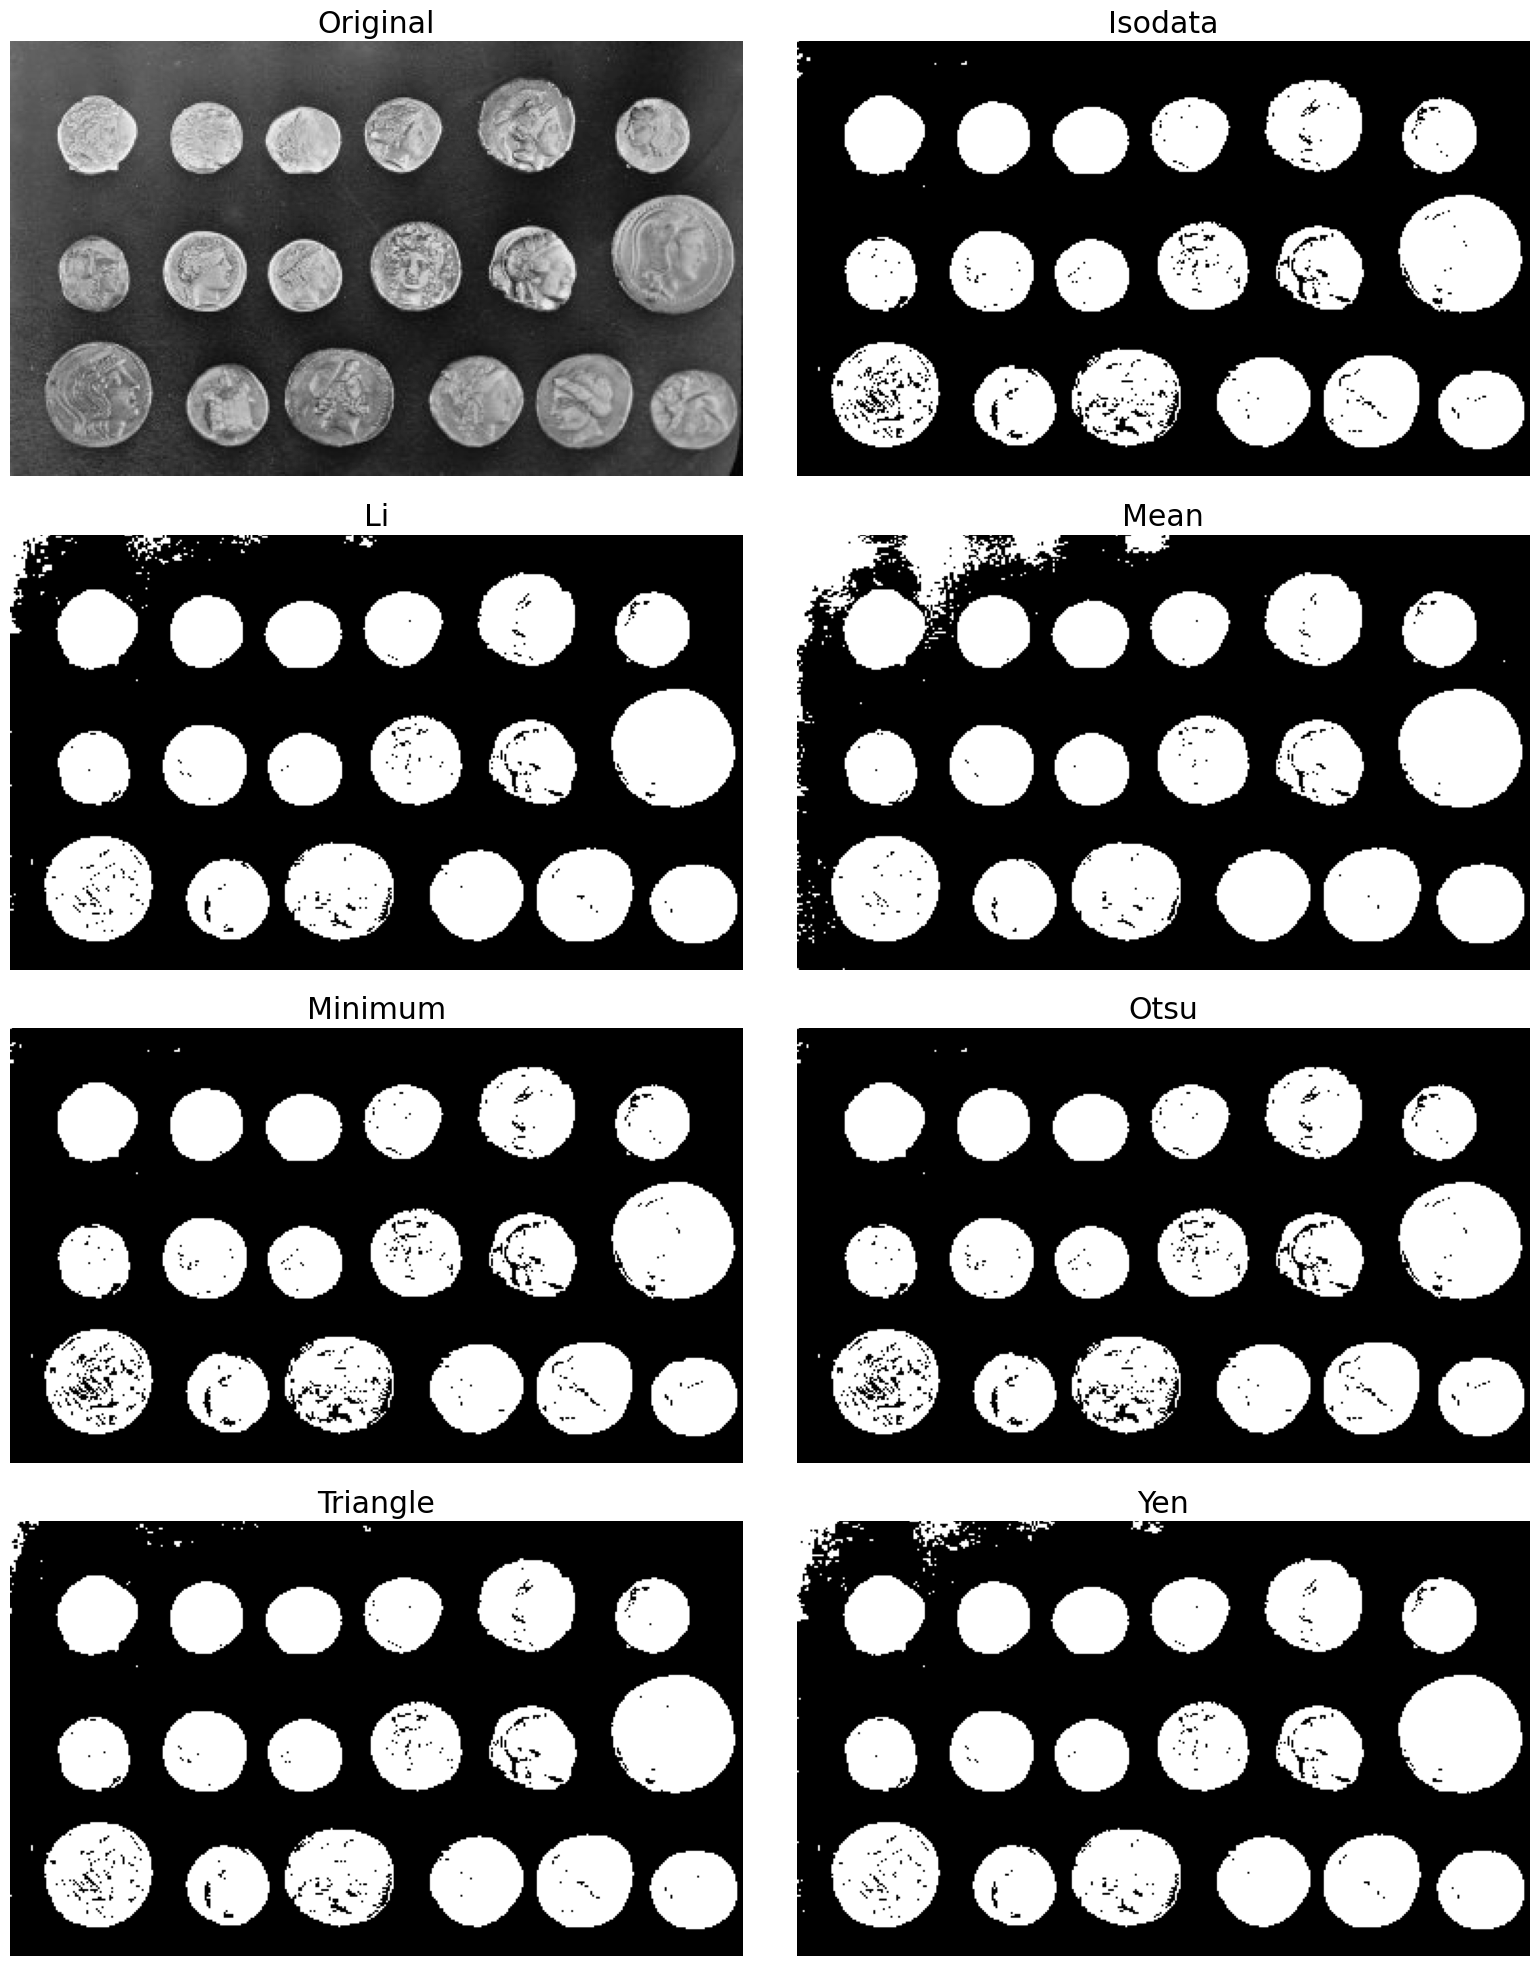

In [21]:
fig, ax = filters.try_all_threshold(coins, figsize= (16, 20), verbose= False)
plt.rcParams['font.size']=18
plt.show()

### Local filtering
This code appears to be performing some image processing operations, particularly filtering and thresholding, and then displaying the processed images using Matplotlib. Let me break down each part of the code:


This code appears to be performing some image processing operations, particularly filtering and thresholding, and then displaying the processed images using Matplotlib. Let me break down each part of the code:

- sElem = disk(20): This line creates a circular structuring element (disk) with a radius of 20 pixels. This structuring element is typically used in morphological operations, such as filtering or erosion.
- pageFloat = page / 255: It converts the input image page into a floating-point image by dividing all pixel values by 255. This is often done to scale pixel values to the [0, 1] range, assuming the input image is in the [0, 255] range.
- pageFilt = filters.rank.mean(pageFloat, selem=sElem) / 255: It performs a mean filter operation on the pageFloat image using the circular structuring element sElem. The filters.rank.mean function calculates the local mean of pixel values using the specified structuring element. The result is then scaled back to the [0, 1] range by dividing by 255.
- pageT1 = (pageFloat - pageFilt) < 0.0: It creates a binary thresholded image pageT1 by subtracting the mean-filtered image (pageFilt) from the original image (pageFloat) and checking if the result is less than 0.0. This essentially identifies regions where the pixel values are lower than the local mean.
- pageT2 = (pageFloat - pageFilt) < -0.05: Similarly, it creates another binary thresholded image pageT2, but with a more negative threshold of -0.05. This means it identifies regions where the pixel values are significantly lower than the local mean.

Code applies local mean filtering to the input image and generates two thresholded images (pageT1 and pageT2) based on the difference between the original image and the mean-filtered image.

The choice of threshold values (-0.05 and 0.0) determines the sensitivity of the thresholding operation.

/var/folders/mt/zbsgqls91d5c1dt725ckq4lc0000gn/T/ipykernel_34612/3573471348.py:3: FutureWarning: `selem` is a deprecated argument name for `mean`. It will be removed in version 1.0. Please use `footprint` instead.
  pageFilt  = filters.rank.mean(pageFloat, selem= sElem) / 255
/var/folders/mt/zbsgqls91d5c1dt725ckq4lc0000gn/T/ipykernel_34612/3573471348.py:3: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  pageFilt  = filters.rank.mean(pageFloat, selem= sElem) / 255


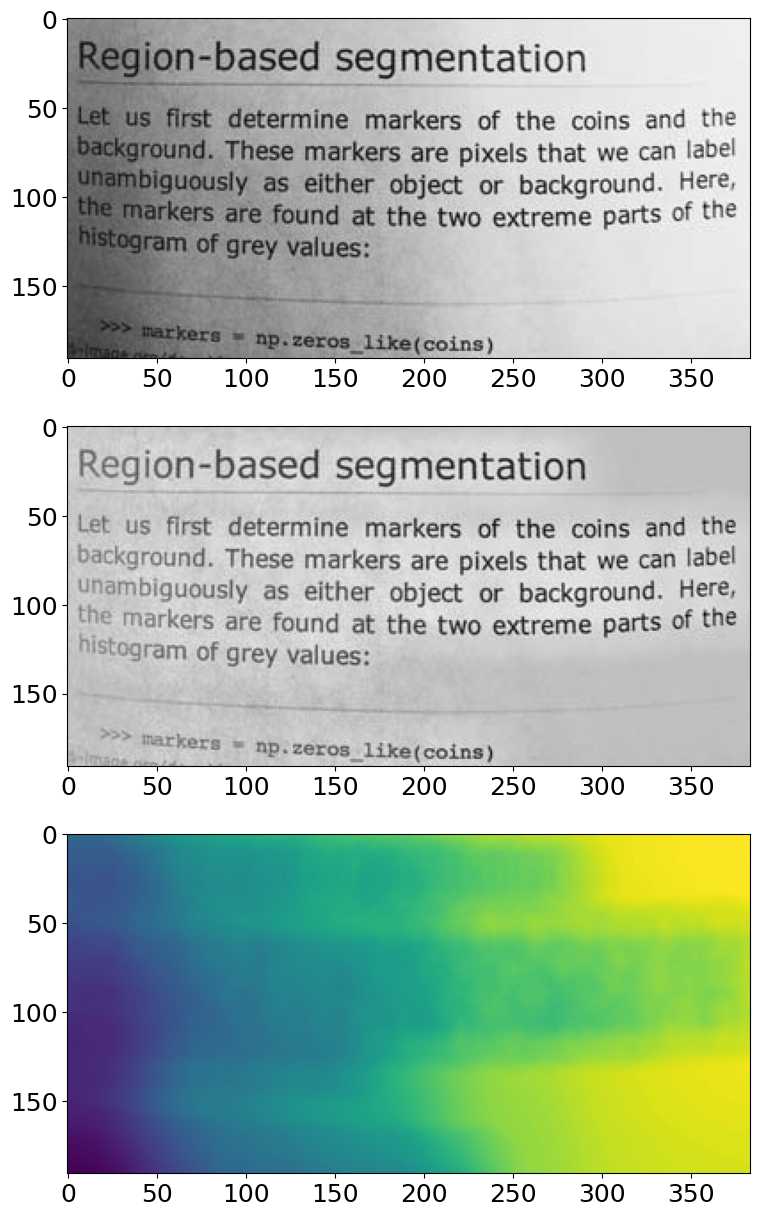

In [45]:
sElem = disk(20)
pageFloat = page / 255
pageFilt  = filters.rank.mean(pageFloat, selem= sElem) / 255

plt.figure(figsize= (20, 15))
plt.subplot(311)
plt.imshow(page, cmap= 'gray')
plt.subplot(312)
plt.imshow((pageFloat - pageFilt), cmap= 'gray')
plt.subplot(313)
plt.imshow(pageFilt)

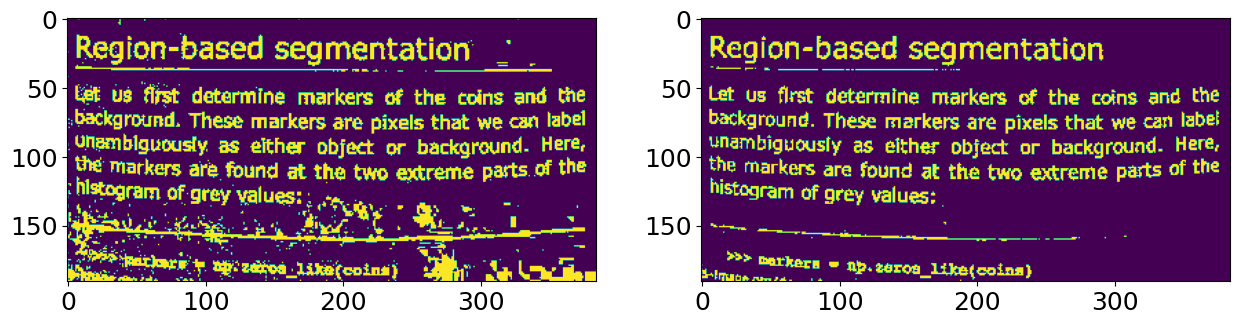

In [46]:
pageT1 = (pageFloat - pageFilt) < 0.0
pageT2 = (pageFloat - pageFilt) < -0.05
plt.figure(figsize= (15, 10))
plt.rcParams['font.size']=18
plt.subplot(121)
plt.imshow(pageT1)
plt.subplot(122)
plt.imshow(pageT2)

## Segmentation by color
Color segmentation is a computer vision and image processing technique used to partition an image into distinct regions or objects based on their color characteristics. It involves separating objects or regions in an image by identifying and classifying pixels or areas that share similar color properties. Color segmentation is commonly used in applications like object recognition, image processing, and computer vision to extract meaningful information from images.

Color models, also known as color spaces, are mathematical representations that define how colors are represented and encoded in digital images. These models provide a way to represent colors in a manner that is perceptually meaningful and suitable for various applications. Common color models include RGB (Red, Green, Blue), HSV (Hue, Saturation, Value), CMYK (Cyan, Magenta, Yellow, Key/Black), and Lab (CIELAB or Lab*).

Show channels separately -> show color intensity

Text(0.5, 1.0, 'Intensity of Blue')

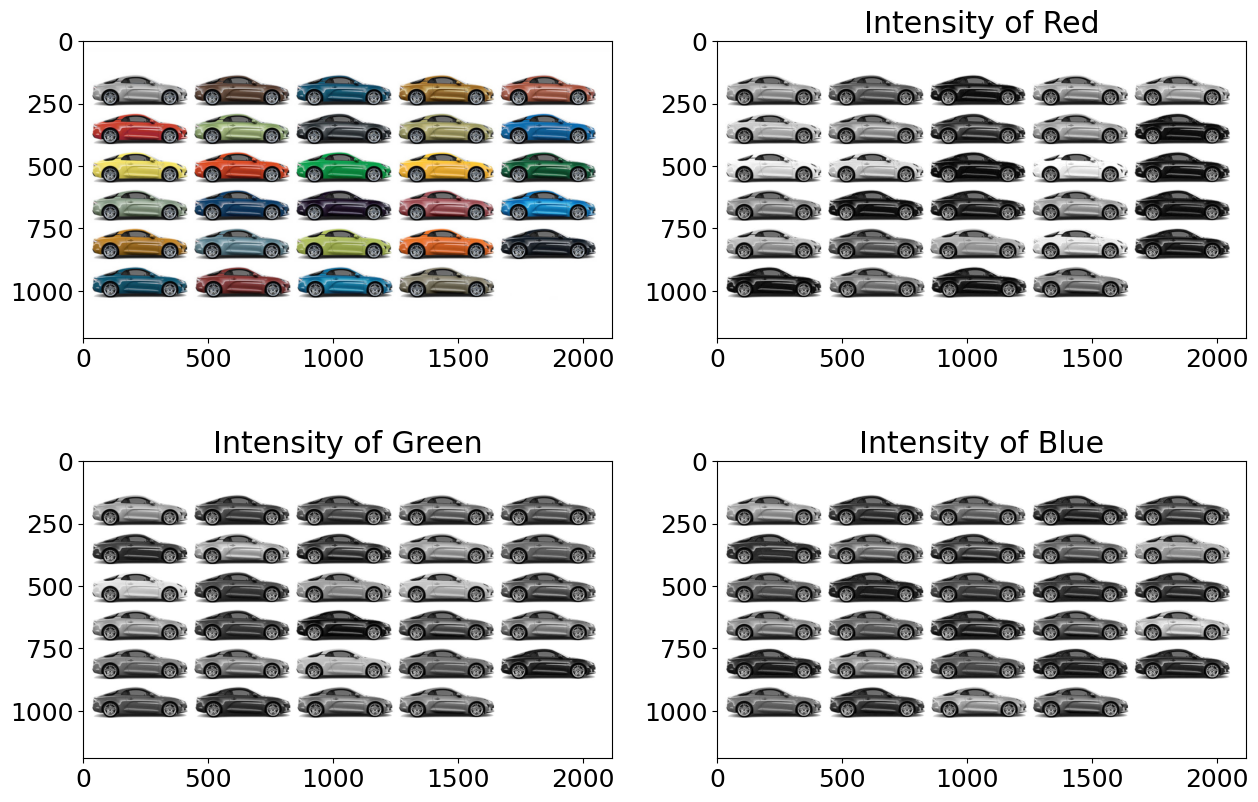

In [49]:
cars = plt.imread('_data/color_cars.jpeg')
plt.figure(figsize= (15, 10))
plt.rcParams['font.size']=18
plt.subplot(221)
plt.imshow(cars)
plt.subplot(222)
plt.imshow(cars[:,:,0], cmap= 'gray')
plt.title('Intensity of Red')
plt.subplot(223)
plt.imshow(cars[:,:,1], cmap= 'gray')
plt.title('Intensity of Green')
plt.subplot(224)
plt.imshow(cars[:,:,2], cmap= 'gray')
plt.title('Intensity of Blue')

CIELAB, often referred to as Lab color space, is a color model designed to approximate human perception of color. It is a three-component color space consisting of the following components:

L* (lightness): Represents the brightness or intensity of a color from black (0) to white (100).
a* (green to red): Represents the position of a color on the green-to-red axis.
b* (blue to yellow): Represents the position of a color on the blue-to-yellow axis.
CIELAB is perceptually uniform, meaning that the Euclidean distance between two Lab colors corresponds closely to the perceived color difference between them.


![CieLab](https://www.xrite.com/-/media/modules/weblog/blog/lab-color-space/lab-color-space.png?h=622&w=600&la=en&hash=53A76941BAB3015346FAB3689739E967843CF8EA)

Text(0.5, 1.0, 'b')

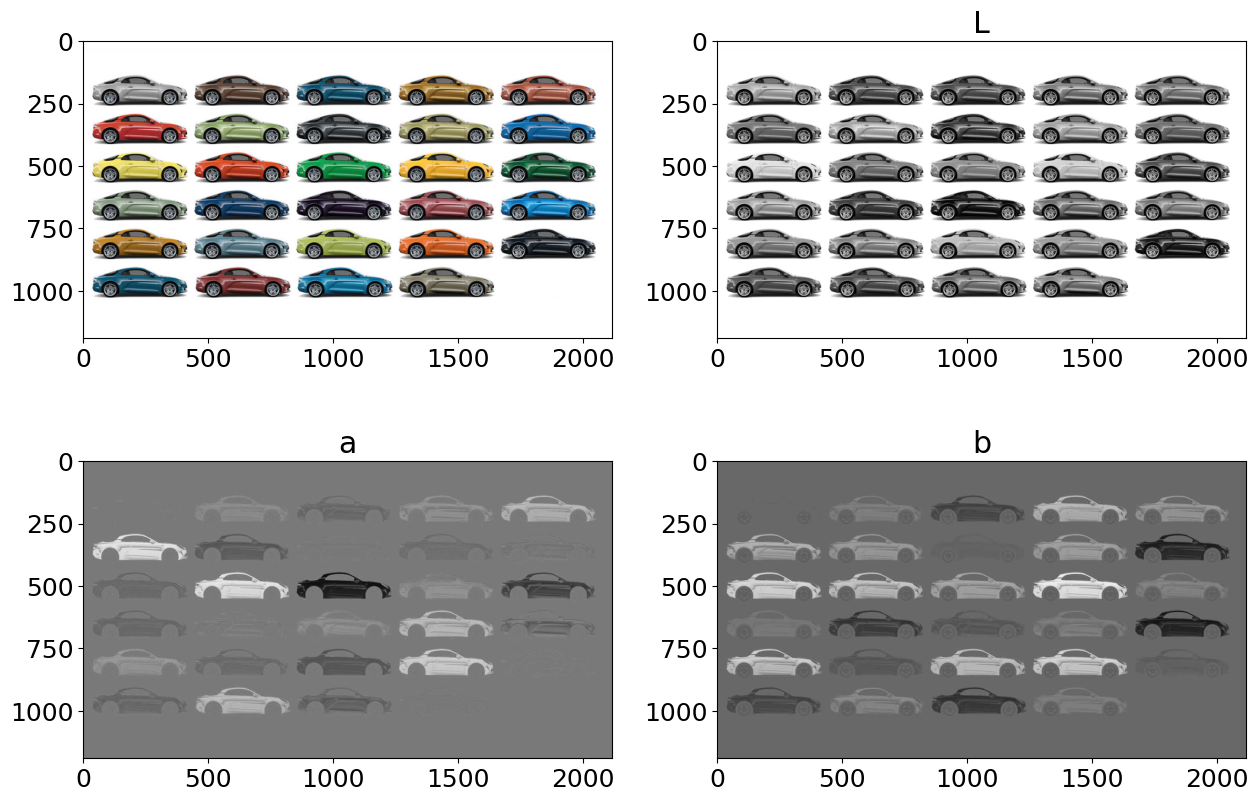

In [53]:
carsLab = color.rgb2lab(cars)


plt.figure(figsize= (15, 10))
plt.rcParams['font.size']=18
plt.subplot(221)
plt.imshow(cars)
plt.subplot(222)
plt.imshow(carsLab[:,:,0], cmap= 'gray')
plt.title('L')
plt.subplot(223)
plt.imshow(carsLab[:,:,1], cmap= 'gray')
plt.title('a')
plt.subplot(224)
plt.imshow(carsLab[:,:,2], cmap= 'gray')
plt.title('b')

Segmentation fo specific color (red)

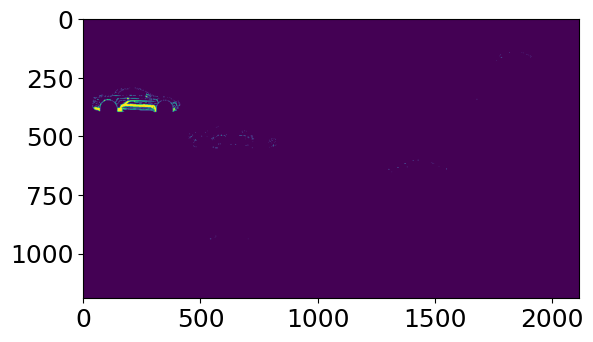

In [52]:
my_car = (carsLab[:,:,1] > 40) * (carsLab[:,:,2] < 30)
plt.imshow(my_car)